In [1]:
# Parameters
notebook_name = "/home/jgrando/Documents/GARD/ASHRAE140Automation/rendered/notebooks/test_notebook.ipynb"


<center><h1>Section 5-2A Output Graphics</h1></center>

In [2]:
import os
import sys
import matplotlib.pyplot as plt
from IPython.display import display, HTML

root_directory = os.path.dirname(os.path.dirname(os.getcwd()))

if os.path.join(root_directory, 'src') not in sys.path:
    sys.path.append(os.path.join(root_directory, 'src'))

from graphics_renderer import GraphicsRenderer

%matplotlib widget
%matplotlib inline

In [3]:
HTML("""
<style>

.jp-RenderedImage {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

.placeholder-span {
    visibility: hidden;
}

.pandas-tbl h2 {
    height: 25px;
    line-height: 18px;
    font-size: 18px;
    text-align: center;
}

.pandas-tbl caption {
    font-size: 20px;
    font-weight: bold;
    text-align: left;
}

.dataframe.pandas-sub-tbl th, .dataframe.pandas-sub-tbl-with-cases th {
    height: 50px;
    line-height: 10px;
    font-size: 10px;
    text-align: center;
}

.dataframe.pandas-sub-tbl td, .dataframe.pandas-sub-tbl-with-cases td {
    font-size: 12px;
}

.dataframe.pandas-sub-tbl-with-cases td:first-child {
    min-width: 300px;
    text-align: left;
}

</style>
""")

In [4]:
gr = GraphicsRenderer('RESULTS5-2A-Test-0.0.0.json')

In [5]:
table_html, msg = gr.render_section_5_2a_table_b_8_1()
table_html

cases,BSIMAC 9-9.0.74,CSE-0.861.1,DeST-2.0-20190401,ESP-r-13.3,EnergyPlus-Version 9.0.1,TRNSYS-TRNSYS 18.00.0001
"600 Base Case, South Windows",4.050,3.992755,4.047,4.3620,4.324,4.503550
610 S. Windows + Overhang,4.163,4.066423,4.144,4.5270,4.375,4.592060
620 East & West Windows,4.370,4.093598,4.297,4.5143,4.485,4.718980
630 E&W Windows + Overhang & Fins,4.923,4.355946,4.677,5.0506,4.784,5.138580
640 Case 600 with Htg Temp. Setback,2.682,2.403242,2.619,2.6544,2.662,2.652750
650 Case 600 with Night Ventilation,0.000,0.000000,0.000,0.0000,0.000,0.000000
660 Low-E Windows,3.574,3.601959,3.821,3.7870,3.707,3.789660
670 Single-Pane Windows,5.484,5.300178,5.573,5.9750,5.616,6.139870
680 Case 600 with Increased Insulation,2.219,1.786102,1.732,2.1321,2.180,2.286260
"685 Case 600 with ""20/20"" Thermostat",4.532,4.574428,4.646,4.9035,4.877,5.042170


In [6]:
table_html, msg = gr.render_section_5_2a_table_b_8_2()
table_html

cases,BSIMAC 9-9.0.74,CSE-0.861.1,DeST-2.0-20190401,ESP-r-13.3,EnergyPlus-Version 9.0.1,TRNSYS-TRNSYS 18.00.0001
"600 Base Case, South Windows",5.822,5.913124,5.432,6.1618,6.027,5.779520
610 S. Windows + Overhang,4.299,4.381794,4.173,4.2325,4.333,4.116800
620 East & West Windows,4.404,4.079308,3.909,4.2457,4.060,3.840650
630 E&W Windows + Overhang & Fins,3.074,3.020403,2.787,2.5953,2.836,2.572870
640 Case 600 with Htg Temp. Setback,5.804,5.643913,5.237,5.8926,5.763,5.477220
650 Case 600 with Night Ventilation,4.629,4.653881,4.186,4.9451,4.817,4.632340
660 Low-E Windows,3.014,3.339690,3.260,3.2186,3.232,2.966250
670 Single-Pane Windows,6.539,6.577744,5.954,6.5203,6.623,6.197800
680 Case 600 with Increased Insulation,5.938,6.429816,5.932,6.5294,6.444,6.309750
"685 Case 600 with ""20/20"" Thermostat",9.130,8.859209,8.238,9.1214,9.119,8.851290


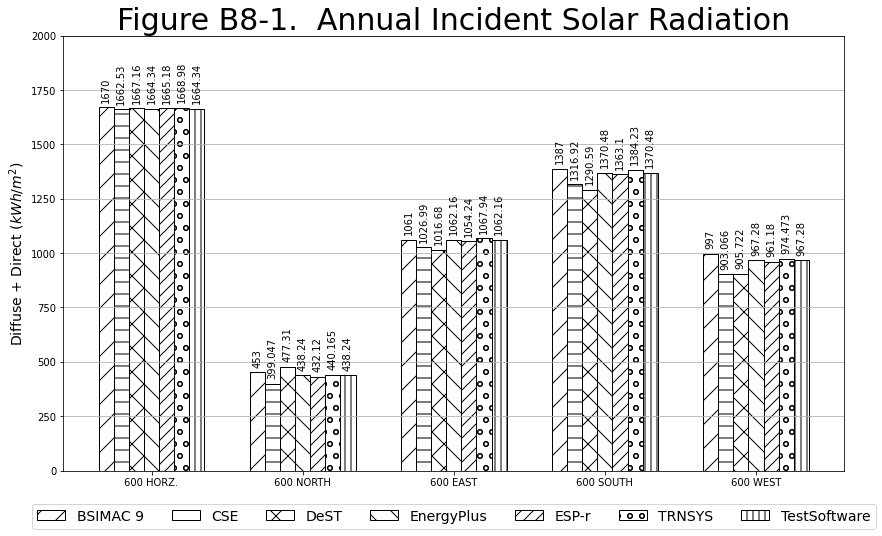

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(14,8))
gr.render_section_5_2a_figure_b_8_1(fig, ax)
plt.show();

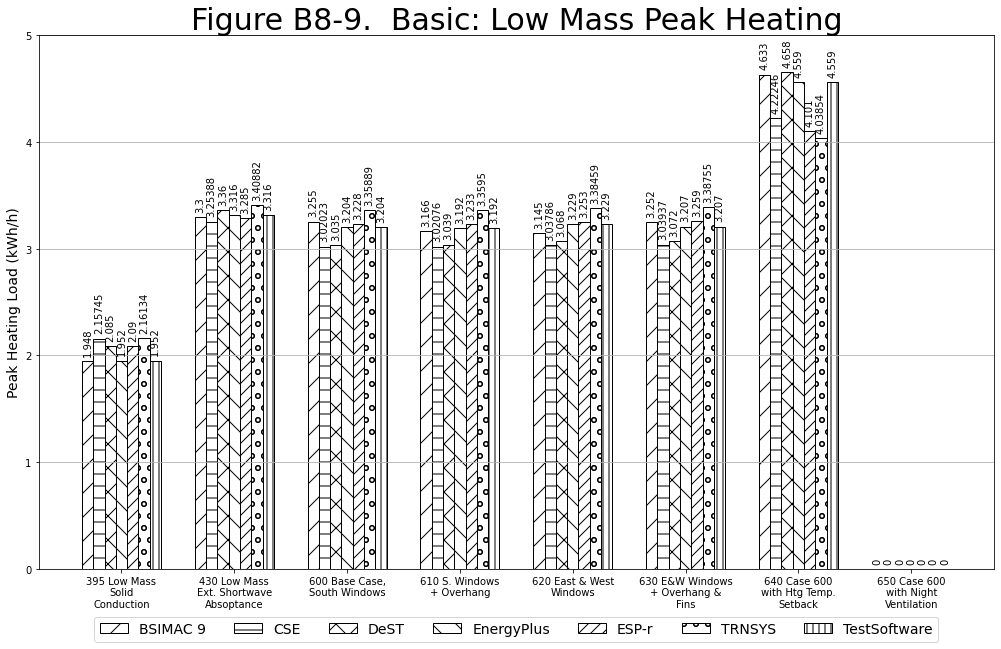

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(14,8))
gr.render_section_5_2a_figure_b_8_9(fig, ax)
plt.show();